In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy import stats
from scipy.stats import norm
%matplotlib inline
import math

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [7]:
test_ID.to_csv('test_id.csv')

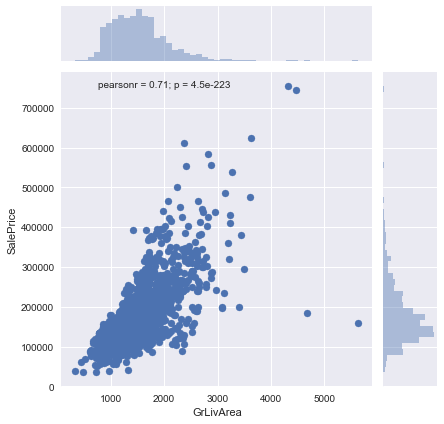

In [8]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=train)

From the descriptive thing:
    "There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately)."

In [9]:
# outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

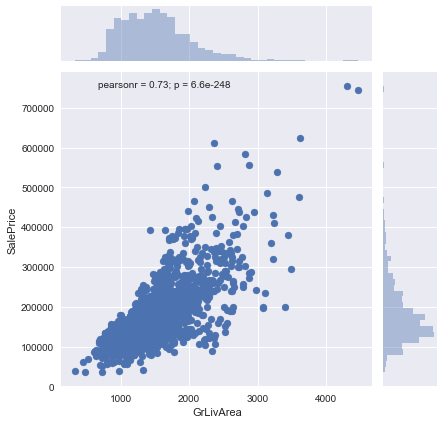

In [10]:
#replotting
sns.jointplot(x ="GrLivArea", y="SalePrice", data=train)

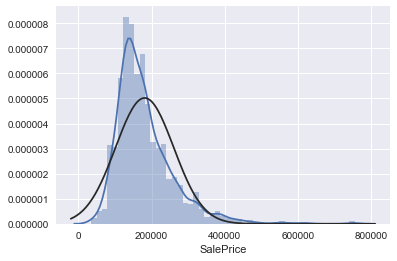

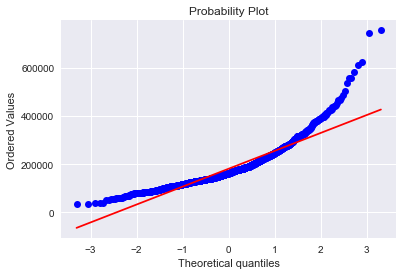

In [11]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

originally used boxcox here, but I couldn't get it to transform the predictions back to normal numbers, so ended up using log1p since it's easy to reverse with np.expm1

In [12]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [13]:
#from sklearn import preprocessing
#from scipy.stats import boxcox

In [14]:
# correcting the skew and kurtosis on our SalePrice variable using BoxCox
#train['SalePrice'] = preprocessing.scale(boxcox(train['SalePrice']+1)[0])

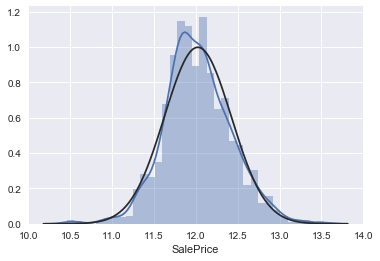

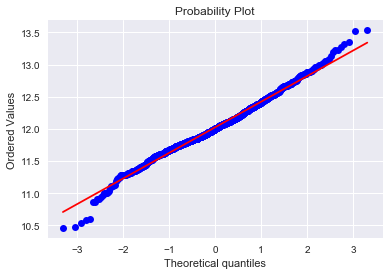

In [15]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [16]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (2917, 79)


# Dealing with Missingness

This data set had a lot of missingness, but the data description that came with it basically showed us how to handle most of it

In [17]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(35)

,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageYrBlt,159,5.450806
GarageCond,159,5.450806


Missing Features:
    Alley: data desc says na means "no alley access"
    BsmtQual, BsmtCond, BsmntExposure, BsmtFinType1, BsmtFinType2: data desc says NA means "no basement"
    FireplaceQU: desc says NA means "No Fireplace"
    GarageType, GarageFinish,GaraGarageQual, GarageCond: desc says NA means "No Garage"
    PoolQC: desc says NA means "No Pool"
    Fence: desc says NA means "No Fence"
    MiscFeature: desc says NA means "None"

In [18]:
data["Alley"] = data["Alley"].fillna("None")
data["BsmtQual"] = data["BsmtQual"].fillna("None")
data["BsmtCond"] = data["BsmtCond"].fillna("None")
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")

In [19]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["GarageType"] = data["GarageType"].fillna("None")
data["GarageFinish"] = data["GarageFinish"].fillna("None")
data["GarageQual"] = data["GarageQual"].fillna("None")
data["GarageCond"] = data["GarageCond"].fillna("None")
data["PoolQC"] = data["PoolQC"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")

In [20]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(8)

,Total,Percent
LotFrontage,486,16.660953
GarageYrBlt,159,5.450806
MasVnrType,24,0.822763
MasVnrArea,23,0.788481
MSZoning,4,0.137127
Functional,2,0.068564
Utilities,2,0.068564
BsmtFullBath,2,0.068564


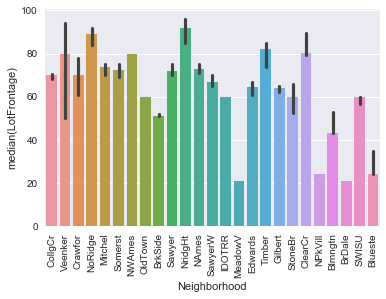

In [21]:
sns.barplot(data=data,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)
plt.show()
plt.gcf().clear()

neighborhood seems a pretty good at determining lot frontage- using the mean neighborhood lot frontage to impute the missing lot frontages

In [22]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [23]:
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)

most likely no basement so setting these basement measurements to zero

In [24]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

Probably no masonry veneer for these houses so setting to 0 or none

In [25]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

filling the 4 missing zoning's with residential- the most common seen zoning type

In [26]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

trying dropping utilities to see if this improves accuracy

In [27]:
data = data.drop(['Utilities'], axis=1)

filling missing functional with most common type (typ)

In [28]:
data['Functional'] = data['Functional'].fillna("Typ")

removing missing garage cars and area

In [29]:
data['GarageCars'] = data['GarageCars'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)

filling the remaining missing values by the most commonly seen value

In [30]:
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [31]:
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])

In [32]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
YrSold,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior1st,0,0.0


OK, all the missingness is taken care of!

In [33]:
# data_corr = data.corr()

In [34]:
# data_corr

# Feature Engineering

transforming year and month into categorical features

In [35]:
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

gonna try putting overall condition as categorical

In [36]:
data['OverallCond'] = data['OverallCond'].astype(str)

MSSubClass should be categorical as well

In [37]:
data['MSSubClass'] = data['MSSubClass'].astype(str)

overall SF? we have TotalBsmtSF, 1stFlrSF and 2ndFlrSF
might be worth putting them together into a "overall SF"category?

In [38]:
data['OverallSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']

going to try combining categorical data with it's quality:
BsmtQual * BsmtCond
OverallQual * Neighborhood
Condition1 * Condition2
BldgType * OverallQual
ExterQual * ExterCond
KitchenQual * OverallQual
GarageType * GarageQual
GarageType * GarageCond
MoSold * YrSold
SaleType * SaleCondition
SaleType * OverallCond

Here's some more features that I thought might be related:

In [39]:
data['BsmnQual_BsmtCond'] = data['BsmtQual'] + data['BsmtCond']
#data['OverallQual_Neighborhood'] = data['OverallQual'] + data['Neighborhood']
data['Condition1_Condition2'] = data['Condition1'] + data['Condition2']
#data['BldgType_OverallQual'] = data['BldgType'] + data['OverallQual']
data['ExterQual_ExterCond'] = data['ExterQual'] + data['ExterCond']
#data['KitchenQual_OverallQual'] = data['KitchenQual'] + data['OverallQual']
#data['GarageType_GarageQual'] = data['GarageType'] + data['GarageQual']
#data['GarageType_GarageCond'] = data['GarageType'] + data['GarageCond']
data['MoSold_YrSold'] = data['MoSold'] + data['YrSold']
data['SaleType_SaleCondition'] = data['SaleType'] + data['SaleCondition']
data['SaleType_OverallCond'] = data['SaleType'] + data['OverallCond']

with all but garageType_garageQual and MoSold_YrSold turned off, I got .12000, which insinuates there's something here that increases my accuracy.

# Figuring out what to do with Nominal & Ordinal Categories

According to the Data Documentation this is the breakdown on the Nominal and Ordinal Categories:

Nomial categories

"MSSubClass", MSZoning, "Street", "Alley", LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1, Exterior2, MasVnrType, MasVnrArea, Foundation, Heating, "CentralAir", GarageType, MiscFeature, SaleType, SaleCondition

Ordinal Categories

LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

We learned to use One-Hot Encoding for linear models and 
label encoder for trees, but since i'm trying to use a mix of different models i'm going to use Label Encoding for the ordinal categories- categories where the order of the data might matter, then One-Hot Encoding for the nominal categories

In [40]:
from sklearn.preprocessing import LabelEncoder
category = ('LotShape', 'LandSlope', 'OverallCond', 'ExterQual', 'ExterCond', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
            'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'OverallCond', 
            'YrSold', 'MoSold', 'Street', 'Alley', 'CentralAir', 'MSSubClass')

for c in category:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values))

# Skewness

Right, so originally we thought that we'd try and fix the Skew of our independant variables, since linear regressions (which are my focus) are highly succeptible to outliers. Unfortunately, this formula only improved the positively skewed variables.  the negatively skewed variables only got worse. I tried running this but instead of increasing our score it hurt it. so we ended up taking this out of our final version.  Given more time, I'd probably try log transforming individual categories then spot-check them.

In [41]:
# numerical = data.dtypes[data.dtypes != "object"].index

In [42]:
# skewed = data[numerical].apply(lambda x: x.skew()).sort_values()

In [43]:
# skewed

In [44]:
# skewdf = pd.DataFrame({'Skew': skewed})
# skewdf.head(3)

In [45]:
# skewdf = skewdf[(skewdf)>0.75]
# from scipy.special import boxcox1p
# skewed = skewdf.index
# lam = 0.15
# for feat in skewed:
#     data[feat] = boxcox1p(data[feat], lam)

In [46]:
#newskewed = data[numerical].apply(lambda x: x.skew()).sort_values()

In [47]:
#newskewed

get_dummies() is just one hot encoding the nominal categories

In [48]:
data = pd.get_dummies(data)

In [49]:
data.shape

(2917, 401)

Re-separating the data into test and train

In [50]:
train = data[:ntrain]
test = data[ntrain:]

In [112]:
#################
import random
random_state = 42
indice_train = random.sample(set(range(1,y_train.shape[0]+1)), 1166)
indice_test = []
for idx,j in enumerate(indices_train):
    if idx not in indices_train:
        indice_test.append(idx)
        

# y = X['SalePrice']
# X.drop("SalePrice", inplace = True, axis = 1)

# Z = W["SalePrice"]
# W.drop("SalePrice", inplace = True, axis = 1)
# y_train.shape
#################

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 36,
 37,
 40,
 41,
 42,
 43,
 44,
 46,
 48,
 50,
 51,
 52,
 53,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 93,
 94,
 95,
 97,
 98,
 100,
 101,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 140,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 170,
 171,
 173,
 175,
 177,
 180,
 182,
 183,
 186,
 188,
 189,
 190,
 192,
 193,
 194,
 195,
 196,
 198,
 199,
 200,
 202,
 203,
 204,
 205,
 207,
 208,
 209,
 210,
 211,
 213,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 224,
 225,
 228,
 229,
 231,
 232,
 233,
 234,
 235,
 236,
 23

In [99]:
0.8 * 1458


1166.4

# Running the Models

In [51]:
# Load libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor as rfr,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

Got this from a kaggler- it's pretty handy, letting us select the number of folds and letting us shuffle the data when we run it

In [52]:
n_folds = 10
#this looks better, lets me use kfolds
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#def rmse(predictions, targets):
#    return np.sqrt(((predictions - targets) ** 2).mean())


Lasso was the first feature that I spotchecked all my changes against- It runs very quickly so it's easy to iterate off of.

In [53]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00099, random_state=1))

In [54]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Lasso score: 0.1130 (0.0142)


In [55]:
lasso.fit(train.values, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [56]:
x = list(zip(train.columns, lasso.steps[1][1].coef_))
x.sort(key = lambda x: x[1])
df = pd.DataFrame(x, columns=['Var', 'Coeff'])

top_pos = df["Coeff"][-20:]
top_neg = df["Coeff"][:20]
top_pos_names = df["Var"][-20:]
top_neg_names = df["Var"][:20]

top_coefs = np.hstack([top_neg, top_pos])
top_names = np.hstack([top_neg_names, top_pos_names])

([<matplotlib.axis.XTick at 0x1a1dca0278>,
 <a list of 40 Text xticklabel objects>)

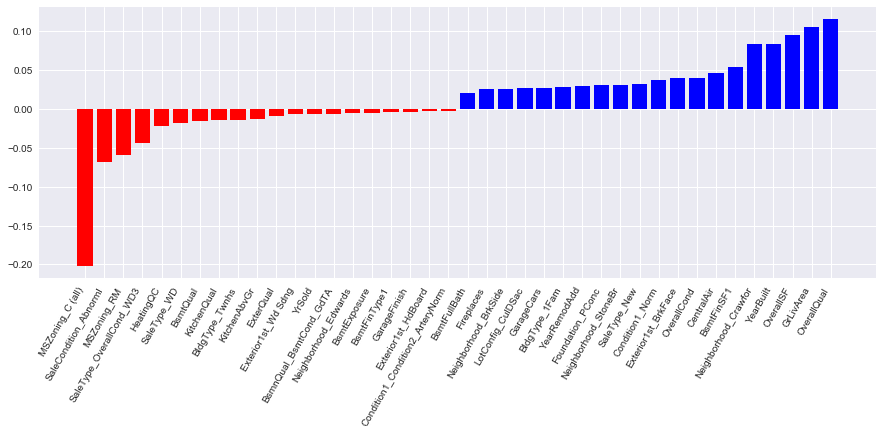

In [57]:
plt.figure(figsize = (15, 5))
colors = ['red' if c < 0 else 'blue' for c in top_coefs]
plt.bar(np.arange(40), top_coefs, color = colors)
feature_names = np.array(train.columns)
plt.xticks(np.arange(40), top_names, rotation = 60, ha = 'right')

ENet ended up being our best individual performer before we switched to stacking.  

In [56]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=1))

#ok so alpha here is the tuning parameter- L1 ratio is the % of penalty assigned to L1 or L2

In [57]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ElasticNet score: 0.1111 (0.0148)


.9 l1_ratio gives score: 0.1098 (0.0145)
.5  gives ElasticNet score: 0.1108 (0.0144)
.7 gives .1099 (0.0146)
alpha=0.0003, l1_ratio=.9 gives score: 0.1107 (0.0145) # while better here it's worse in my actual score

In [58]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [59]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1135 (0.0161)



In [60]:
GBoost.fit(train.values, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

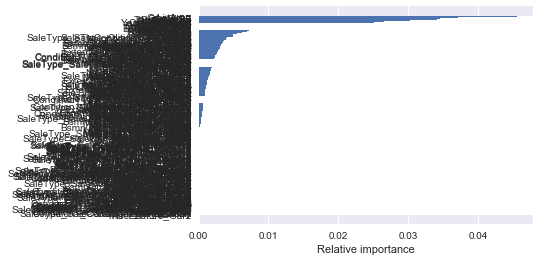

In [63]:
indices = np.argsort(GBoost.feature_importances_)
top_ind = indices[indices > 0]
names = list(train)

# plot as bar chart
plt.barh(np.arange(len(names)), GBoost.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

Kernel Ridge was another model I tried out but ended up tossing due to low starting scores- I didn't want to bother spending the time on a model that wasn't performing relatively well to begin with

In [64]:
#KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [65]:
#score = rmsle_cv(KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ugh, terrible! 0.5700 (0.3144) high mean score, stupidly high standard dev, something's wrong here but i dont think it'll be worth the effort to fix at this point

In [61]:
LGBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=2, max_features='sqrt',
                                    min_samples_leaf=15, min_samples_split=10,
                                    loss='huber', random_state =5)

In [62]:
score = rmsle_cv(LGBoost)
print("LGBoost score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBoost score: 0.1128 (0.0161)



In [63]:
LGBoost.fit(train.values, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

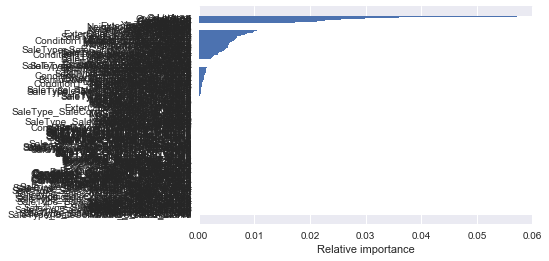

In [69]:
indices = np.argsort(LGBoost.feature_importances_)
names = list(train)

# plot as bar chart
plt.barh(np.arange(len(names)), LGBoost.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

Random forest- this one also underperformed out of the gate and also took relatively long to run compared to my linear models so I ended up discarding it instead of trying to tune it.

In [70]:
rfr = rfr(random_state=0,
        n_estimators=1000, max_depth=6,  max_features='sqrt')

In [71]:
score = rmsle_cv(rfr)
print("rfr score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

rfr score: 0.1651 (0.0157)



# Submitting the original models to kaggle

In [1745]:
ENet.fit(train.values, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False))])

In [1746]:
final = ENet.predict(test)

In [1747]:
final

array([ 11.69420004,  11.92437534,  12.09453884, ...,  12.04448875,
        11.64709749,  12.34173156])

In [1748]:
results = np.expm1(ENet.predict(test))

In [1749]:
results

array([ 119873.42771696,  150899.40717836,  178891.23103759, ...,
        170158.03068075,  114357.95247989,  229057.23644241])

In [1750]:
attempt4 = pd.DataFrame()
attempt4['Id'] = test_ID
attempt4['SalePrice'] = results
attempt4.to_csv('submit9.csv', index=False)

attempt4 is using the ENet. it resulted in a score of 0.11922 on kaggle

# Ensembling by Averaging

the goal was to try and grab 2 random forest, 1 or 2 regression and 2 or 3 gbr. started with the models used in the kaggle jumpstart but liked my models better- discarded the random forest because it was underperforming compared to these other models

In [64]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    #cloning models to fit the data
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        #training the cloned models
        for model in self.models_:
            model.fit(X, y)
            
        return self
    
    #predicting based on the cloned models
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_])
        #averaging the predictions
        return np.mean(predictions, axis=1)
    

In [59]:
# import random

# def feature_importances(clf, X, y):
#     score = np.mean(cross_val_score(clf, X,y,scoring='roc_auc'))
#     importances = {} 
#     for i in range(X.shape[1]):
#         X_perm = X.copy()
#         X_perm[:,i] = random.sample(X[:,i].tolist(), X.shape[0])
#         perm_score = np.mean(cross_val_score(clf, X_perm , y, scoring='roc_auc'))
#         importances[i] = score - perm_score

#     return importances

In [65]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso, LGBoost))

In [66]:
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1071 (0.0158)



In [69]:
train.shape
y_train.shape

(1458,)

In [54]:
averaged_models.fit(train.values, y_train)

AveragingModels(models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False...           presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)))

In [ ]:

averaged_models.predict(

In [126]:
finalstack = averaged_models.predict(test)

In [127]:
finalstack

array([ 11.70799558,  11.93892418,  12.12511845, ...,  12.02246121,
        11.66356056,  12.32596177])

In [130]:
resultstack = np.expm1(averaged_models.predict(test))

In [131]:
resultstack

array([ 121538.62061576,  153110.88005588,  184446.18712878, ...,
        166450.8251386 ,  116256.23479401,  225473.3691775 ])

In [132]:
attempt = pd.DataFrame()
attempt['Id'] = test_ID
attempt['SalePrice'] = resultstack
attempt.to_csv('stacksubmit1.csv', index=False)

this gave us our best score to date which is 0.11751. our best score outside stacking (with just ENet was 0.11922)

# Old discarded attempt at stacking

In [1556]:
# models = [
#     # linear model, ElasticNet = lasso + ridge
#     ElasticNet(random_state=0),
    
#     # conservative random forst model
#     rfr(random_state=0,
#         n_estimators=1000, max_depth=6,  max_features='sqrt'),
    
#     # aggressive random forst model
#     rfr(random_state=0, 
#         n_estimators=1000, max_depth=9,  max_features='auto'),
    
#     # conservative gbm model
#     gbr(random_state=0, learning_rate = 0.005, max_features='sqrt',
#         min_samples_leaf=15, min_samples_split=10, 
#         n_estimators=3000, max_depth=3),
    
#     # aggressive gbm model
#     gbr(random_state = 0, learning_rate = 0.01, max_features='sqrt',
#         min_samples_leaf=10, min_samples_split=5, 
#         n_estimators = 1000, max_depth = 9)
#     ]

# meta_model = lr(normalize=True)


In [1557]:
#%%time
#stacking_prediction = stacking_regression(models, meta_model, train, y_train, test,
#                               transform_target=np.log1p, transform_pred = np.expm1, 
#                               metric=rmsle, verbose=1)

metric: [rmsle]

model 0: [ElasticNet]
    ----
    MEAN:   [0.03323538]

model 1: [RandomForestRegressor]
    ----
    MEAN:   [0.01373886]

model 2: [RandomForestRegressor]
    ----
    MEAN:   [0.01187843]

model 3: [GradientBoostingRegressor]
    ----
    MEAN:   [0.01016542]

model 4: [GradientBoostingRegressor]
    ----
    MEAN:   [0.01031268]

CPU times: user 1min 1s, sys: 308 ms, total: 1min 1s
Wall time: 1min 1s


In [1558]:
#stacking_prediction

array([ 11.71492013,  11.95694426,  12.11837029, ...,  12.00538928,
        11.7119364 ,  12.31906447])

In [1561]:
#Eresults = np.expm1(stacking_prediction)

In [1562]:
#Eresults

array([ 122383.14810574,  155894.97857936,  183205.69778581, ...,
        163633.28978136,  122018.53081885,  223923.55480804])

In [1563]:
# attempt4 = pd.DataFrame()
# attempt4['Id'] = test_ID
# attempt4['SalePrice'] = Eresults
# attempt4.to_csv('submit8.csv', index=False)

the ensemble got me 0.12364, which is worse than my Enet

In [157]:
test

pandas.core.frame.DataFrame

In [149]:
# fold1 = train[:292]
fold1 = train.copy()
fold1 = fold1.drop(fold1.index[:292])
y_fold1_train = y_train.copy()
y_fold1_train = np.delete(y_fold1, np.arange(0, 292))
y_fold1_test = y_train[:292]

# fold2 = train.copy()
# fold2 = fold2.drop(fold2.index[292:584]) # 80%
# y_fold2 = y_train[292:584] # 20%

# fold3 = train.copy()
# fold3 = fold3.drop(fold3.index[584:876])
# y_fold3 = y_train[584:876]

# fold4 = train.copy()
# fold4 = fold4.drop(fold4.index[876:1167])
# y_fold4 = y_train[876:1167]

# fold5 = train.copy()
# fold5 = fold5.drop(fold5.index[1167:])
# y_fold5 = y_train[1167:]

In [150]:
averaged_models.fit(fold1.values, y_fold1)

AveragingModels(models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False...           presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)))

In [156]:
# pred_fold1 = averaged_models.predict(y_fold1_test.reshape)
len(y_train)
# type(y_fold1_test)

1458

In [145]:
y_fold1_test.reshape(-1, 1)

array([[ 12.24769912],
       [ 12.10901644],
       [ 12.31717117],
       [ 11.84940484],
       [ 12.4292202 ],
       [ 11.8706069 ],
       [ 12.63460628],
       [ 12.20607765],
       [ 11.7745279 ],
       [ 11.67844838],
       [ 11.77144388],
       [ 12.75130259],
       [ 11.87757552],
       [ 12.54076115],
       [ 11.96400745],
       [ 11.79056478],
       [ 11.9117083 ],
       [ 11.40757606],
       [ 11.97666577],
       [ 11.84223641],
       [ 12.69250619],
       [ 11.84510995],
       [ 12.34583894],
       [ 11.7745279 ],
       [ 11.94471437],
       [ 12.45410781],
       [ 11.8115549 ],
       [ 12.63134365],
       [ 12.24289144],
       [ 11.13460362],
       [ 10.59665973],
       [ 11.91405452],
       [ 12.10016198],
       [ 12.01673252],
       [ 12.53357982],
       [ 12.64109979],
       [ 11.88449592],
       [ 11.93819974],
       [ 11.59911234],
       [ 11.31448672],
       [ 11.98293534],
       [ 12.0435596 ],
       [ 11.87757552],
       [ 11

In [109]:
print(train[292:584])

     1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  \
292      1148       568          0      1             3         4   
293      1468       795          0      1             3         4   
294      1644         0          0      1             3         4   
295      1003         0          0      1             3         4   
296       910       648          0      1             4         4   
297       975       975          0      2             3         4   
298      1041       702          0      1             3         4   
299      1152         0          0      1             3         4   
300      1336         0          0      1             2         4   
301      1210      1242          0      1             4         4   
302      1541         0          0      1             3         4   
303       894         0          0      1             3         4   
304      1675      1818          0      1             3         4   
305      2000         0          0

In [90]:
len(y_train)

1458

In [115]:
abc = train[300:305], train[310:315]
type(abc)

tuple

In [113]:
type(train)

pandas.core.frame.DataFrame